[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a- Gender (M,F)
b- Temperature, Height, Light intensity (Any measurable value)
c- Eggs in a carton (6, 12, 18, 24)
d- Points on a line (-infinity, infinity)

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [76]:
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
# carbon_west.head(n=10)
# print(carbon_west.columns)
carbon_west.head(10)


,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions. 

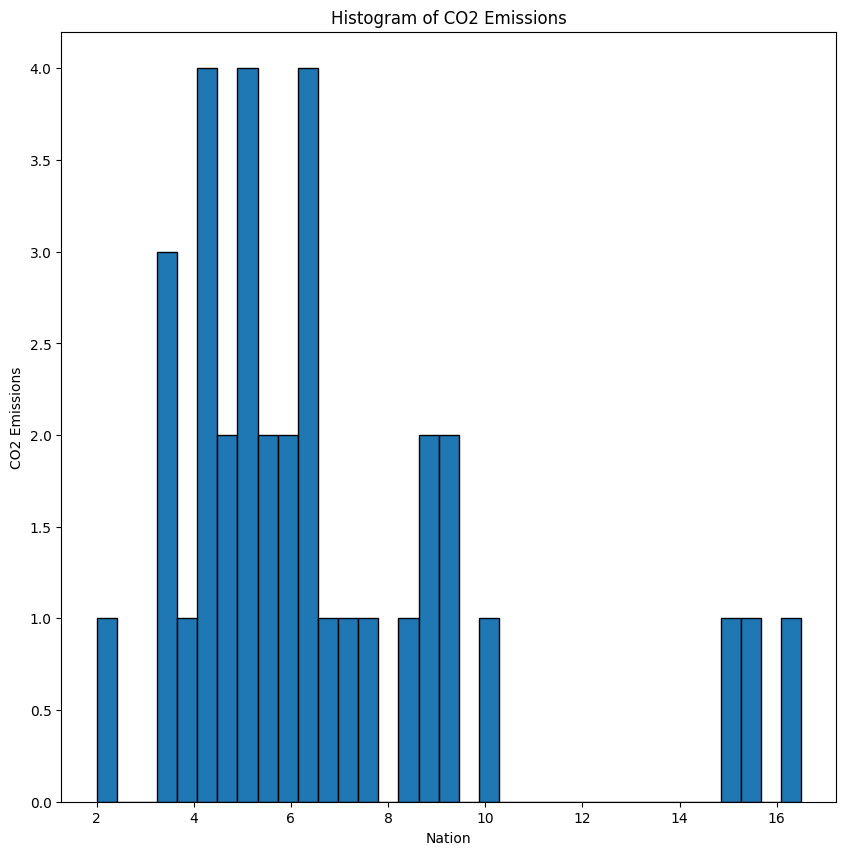

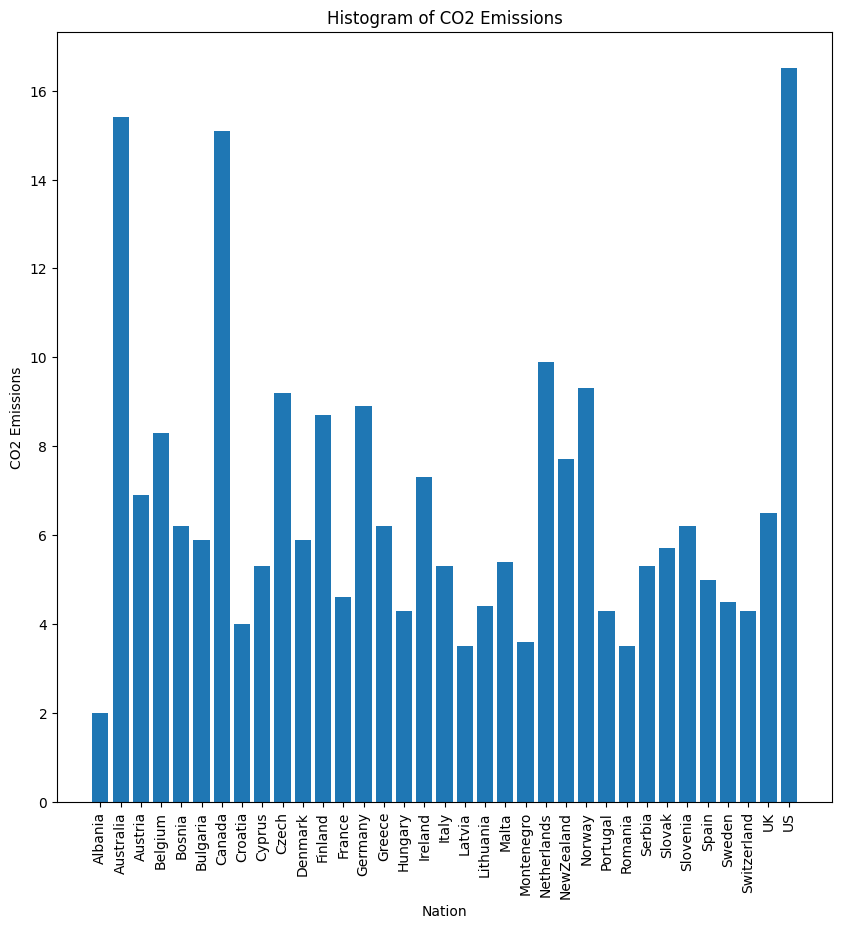

In [94]:
#This is how constructing the histogram was epxlained, 
# but it does not seem right because the x axis does not display the nations 
# and y axis does not display the emissions.
plt.figure(figsize=(10, 10))
plt.hist(carbon_west["CO2"], bins=35, edgecolor="black")
plt.title("Histogram of CO2 Emissions")
plt.xlabel("Nation")
plt.ylabel("CO2 Emissions")

#This seems more correct since we are comparing the correlation 
# between the nation and the amount of CO2 emissions, 
# not the frequency of of CO2 emissions.
plt.figure(figsize=(10, 10))
plt.bar(carbon_west["Nation"], carbon_west["CO2"])
plt.title("Histogram of CO2 Emissions")
plt.xlabel("Nation")
plt.xticks(rotation=90)
plt.ylabel("CO2 Emissions")
plt.show()


Part b. Find the mean, median, and standard deviation. 

In [95]:
carbon_west["CO2"].describe()

count    35.000000
mean      6.717143
std       3.356949
min       2.000000
25%       4.450000
50%       5.900000
75%       8.000000
max      16.500000
Name: CO2, dtype: float64

**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [96]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders_no_dc = murders[:-1]
print(murders.columns)

Index(['state', 'murder'], dtype='object')


Part a. Find the mean and standard deviation for murders without D.C.

In [100]:
mean_value = np.mean(murders_no_dc["murder"])
std_deviation = np.std(murders_no_dc["murder"])

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [102]:
minimum = np.min(murders_no_dc["murder"])
q1 = np.percentile(murders_no_dc["murder"], 25)
median = np.median(murders_no_dc["murder"])
q3 = np.percentile(murders_no_dc["murder"], 75)
maximum = np.max(murders_no_dc["murder"])

print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [107]:
mean_value = np.mean(murders["murder"])
minimum = np.min(murders["murder"])
q1 = np.percentile(murders["murder"], 25)
median = np.median(murders["murder"])
q2 = np.percentile(murders["murder"], 75)
maximum = np.max(murders["murder"])

print(f"Mean: {mean_value}")
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")


print("\nThe mean value is affected more by the outlier as it jumps from a value of 4.874 to 5.253.")

Mean: 5.252941176470588
Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.175
Maximum: 24.2

The mean value is affected more by the outlier as it jumps from a value of 4.874 to 5.253.


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [108]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
print(houses.columns)

Index(['case', 'price', 'size', 'new', 'taxes', 'bedrooms', 'baths'], dtype='object')


Part a. Construct a scatterplot between square feet and price of a home. 

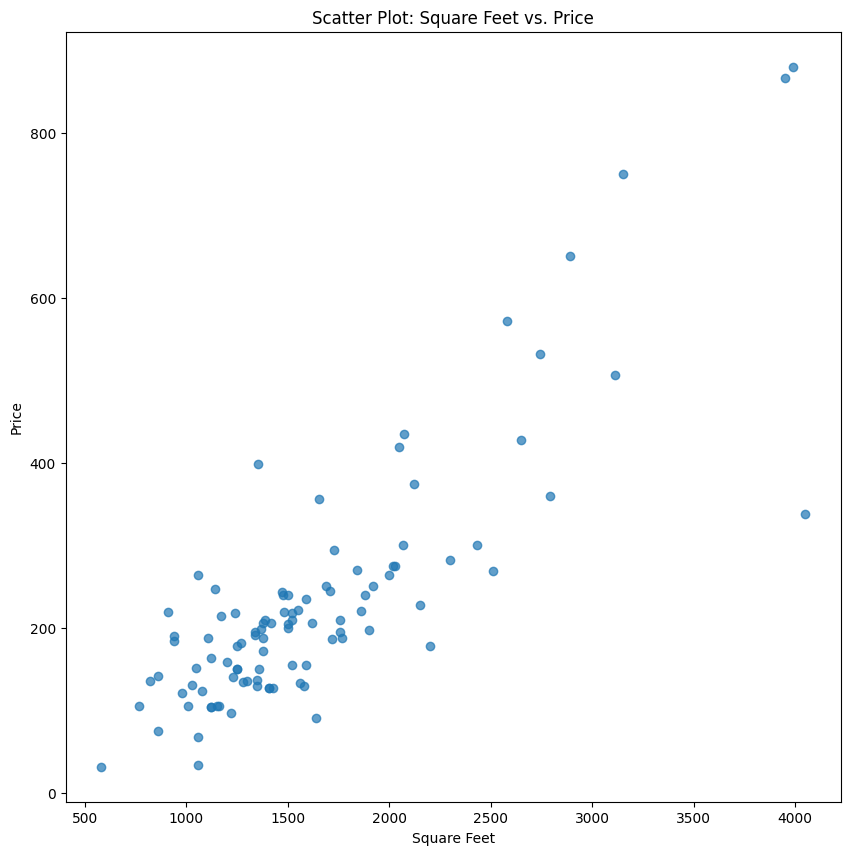

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(houses["size"], houses["price"], alpha=0.7)
plt.title("Scatter Plot: Square Feet vs. Price")
plt.xlabel("Square Feet")
plt.ylabel("Price")

plt.show()

Part b. Find the correlation between the two variables.

In [116]:
correlation = houses["size"].corr(houses["price"])
print(f"Correlation between Square Feet and Price: {correlation}")

Correlation between Square Feet and Price: 0.8337847885586536


Part c. Find and plot the regression line on top of the scatterplot. 

In [123]:
x = houses[["size"]]
y = houses["price"]

linReg = LinearRegression()

linReg.fit(x, y)

slope = linReg.coef_[0]
intercept = linReg.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): 0.18989116794379626
Intercept: -76.38938210746844


Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

<Figure size 1000x1000 with 0 Axes>

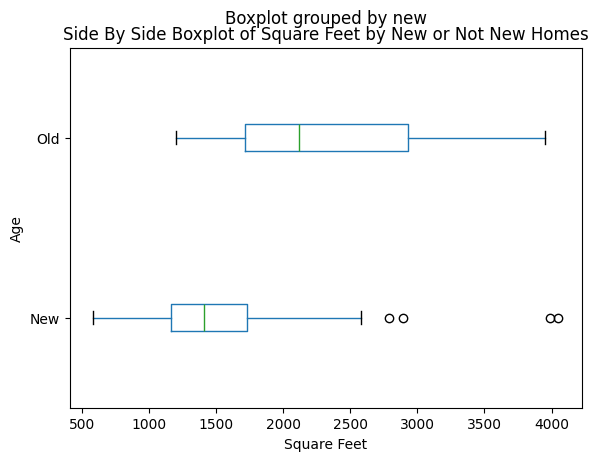

In [137]:
plt.figure(figsize=(10,10))
houses.boxplot(column="size", by="new", vert=False, grid=False)
plt.title("Side By Side Boxplot of Square Feet by New or Not New Homes")
plt.xlabel("Square Feet")
plt.ylabel("Age")

#Changes the 0 or 1 age value to new or old string
yticks = plt.yticks()[0]
ytick_labels = ['New' if tick == 1 else 'Old' for tick in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()



Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

Size and Price: Based on the scatter plot and the slope coefficient, one can see that there is a positive trend in the scatter plot data, but the coefficient of 0.19 indicates that the price has a very weak relationship with the size of the house.

Age and Price: By looking at the boxplot, the IQR and the median of the old houses indicates that the majority of the houses are older and larger. The lower quartiles of newer houses are close to the median of the older houses which would indicate that newer homes are much smaller than older homes.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [135]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
print(happy.columns)

Index(['subject', 'happiness', 'marital', 'gender'], dtype='object')


In [136]:
pd.crosstab(happy["marital"], happy["happiness"], normalize = "index")

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,0.304462,0.000000,0.000000,0.00000,0.56168,0.000000,0.000000,0.000000,0.133858,0.000000,0.000000,0.000000
fem,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mal,0.000000,0.119553,0.036872,0.06257,0.00000,0.255866,0.127374,0.234637,0.000000,0.036872,0.050279,0.075978
male,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
